# Problem 3: Drawing Regions Of Interest (ROIs) 

Given the summary images, the next step is to draw ROIs around the image to isolate the pixels belonging to a specific cell.

## Part A: 

* Write a short script that takes in a summary image and potentially other information (i.e., a seed pixel selected by the user), and outputs a binary mask over an ROI. 

* Find 5 different ROIs in the data provided.

In [1]:
# Sobel Kernel to detect edges
from pathlib import Path
from PIL import Image
from sthom215_problem_3_exercise_1 import *

import matplotlib.pyplot as plt

home = Path('/home/skyler/Documents/SP2024/580_695/homeworks/NSC_HW1/')
fname = 'TEST_MOVIE_00001-small.tif'
fpath = home / fname

In [1]:
tiff = TIFF_IO(fpath)
tiff.read_tiff()
plt.imshow(tiff.movie[3])
plt.axis('off')

NameError: name 'TIFF_IO' is not defined

In [3]:
roi_extractor = ROI_Extraction(tiff.movie[3])

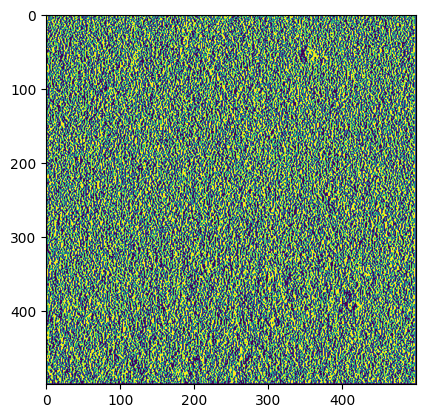

In [4]:
plt.imshow(roi_extractor.convolve_image('l_scharr'))

In [21]:
frame = 100
roi_extractor.kernel = KERNELS['l_sobel']
roi_extractor.kernel
med_val = np.median(roi_extractor.convolve_image('l_sobel'))
mean_val = np.mean(roi_extractor.convolve_image('l_sobel'))
roi_extractor.get_mask(tiff.movie[frame],KERNELS['l_sobel'], mean_val)

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
mask = roi_extractor.get_mask(tiff.movie[frame],KERNELS['l_sobel'], mean_val)
masked = tiff.movie[3]*mask

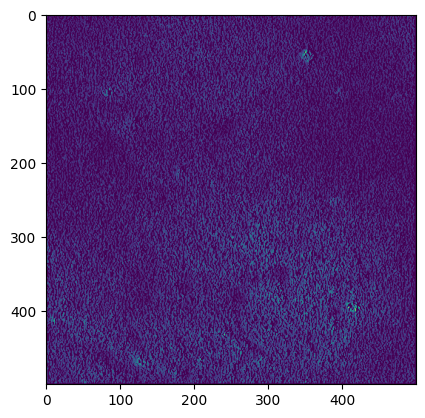

In [23]:
plt.imshow(masked)